In [1]:
# Import libraries
import networkx as nx
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go 

In [2]:
# Data loading 
df_classes = pd.read_csv('elliptic_txs_classes.csv')
df_features = pd.read_csv('elliptic_txs_features.csv', header=None)
df_edgelist = pd.read_csv('elliptic_txs_edgelist.csv')

In [3]:
# exploring the basics of our classes 
df_classes.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [4]:
df_classes.info

<bound method DataFrame.info of              txId    class
0       230425980  unknown
1         5530458  unknown
2       232022460  unknown
3       232438397        2
4       230460314  unknown
...           ...      ...
203764  173077460  unknown
203765  158577750  unknown
203766  158375402        1
203767  158654197  unknown
203768  157597225  unknown

[203769 rows x 2 columns]>

In [5]:
# renaming my columns 
df_classes.columns = ['ID'] + ['Class']
# check 
df_classes.head()

,ID,Class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [6]:
df_classes['Class'].value_counts()
# 1 means the transaction is illicit / illegal 
# 2 means the transaction is licit / legal 

# we will change the 'unknown class' to 3 so that is well suited with the form of the other classes 
df_classes.loc[df_classes['Class'] == 'unknown', 'Class'] = 3

           ID
Class        
3      157205
1        4545
2       42019


<BarContainer object of 3 artists>

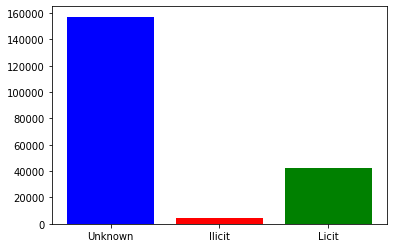

In [7]:
# visualize the total number of each class  
group_class = df_classes.groupby('Class').count()
print(group_class)
plt.bar(['Unknown','Ilicit', 'Licit'], group_class['ID'].values, color=['b', 'r', 'g'] )

In [8]:
#  exploring the basics of our features 
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [9]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 167 entries, 0 to 166
dtypes: float64(165), int64(2)
memory usage: 259.6 MB


In [10]:
df_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
count,2.037690e+05,203769.000000,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,...,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05,2.037690e+05
mean,1.711310e+08,23.843961,5.132771e-17,2.178534e-14,1.609496e-13,-1.966206e-15,-4.104424e-15,6.953564e-15,4.018656e-14,-1.027389e-15,...,-8.620828e-15,1.915670e-15,5.923961e-15,2.052502e-14,6.975481e-15,2.943190e-14,-1.748264e-14,8.625937e-14,-6.533539e-14,-1.622942e-14
std,1.104655e+08,15.172170,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,1.076000e+03,1.000000,-1.729826e-01,-2.105526e-01,-1.756361e+00,-1.219696e-01,-6.372457e-02,-1.130020e-01,-6.158379e-02,-1.636459e-01,...,-5.770994e-01,-6.262286e-01,-9.790738e-01,-9.785560e-01,-2.160569e-01,-1.259391e-01,-1.311553e-01,-2.698175e-01,-1.760926e+00,-1.760984e+00
25%,8.433452e+07,9.000000,-1.725317e-01,-1.803266e-01,-1.201369e+00,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.635168e-01,...,-5.696264e-01,-5.946915e-01,-9.790738e-01,-9.785560e-01,-9.888874e-02,-8.749016e-02,-1.311553e-01,-1.405971e-01,-1.206134e-01,-1.197925e-01
50%,1.624375e+08,23.000000,-1.692045e-01,-1.328975e-01,4.636092e-01,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.620440e-01,...,-4.799511e-01,-4.559278e-01,2.411283e-01,2.414064e-01,1.827940e-02,-8.749016e-02,-1.311553e-01,-9.752359e-02,-1.206134e-01,-1.197925e-01
75%,2.454798e+08,38.000000,-1.318553e-01,-5.524241e-02,1.018602e+00,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.355932e-01,...,1.552495e-01,1.212026e-01,1.305594e+00,1.398764e+00,1.827940e-02,-8.749016e-02,-8.467423e-02,-9.752359e-02,1.520067e-01,1.199710e-01
max,4.032446e+08,49.000000,7.168197e+01,7.359505e+01,2.683580e+00,4.902760e+01,2.600907e+02,5.456518e+01,1.134409e+02,7.335457e+01,...,7.862953e+00,7.914041e+00,1.461330e+00,1.461369e+00,1.170692e+02,2.518490e+02,2.387835e+02,1.057340e+02,1.519700e+00,1.521399e+00


In [11]:
# The file with features is anonimyzed, it doesn't even have column names.
#Let's see what can be derived from the data description:

#1) The first column (column 0) is the transaction id

#2) Column 1 represents timesteps for each node. These timestamps have an interval of ~2 weeks. 
#   Each timestamp contains connected component of transactions,
#   which appeared on the blockchain within less than three hours between each other

#3) Next 93 features represent local information about the transaction — including the time step described above, 
#   number of inputs/outputs, transaction fee, output volume and aggregated figures 
#   such as average BTC received (spent) by the inputs/outputs and average number 
#   of incoming (outgoing) transactions associated with the inputs/outputs.

#4) The  72 features represent nonlocal (graph) information in the form of aggregated features,
#   obtained using transaction information one-hop backward/forward from the center node — giving the maximum
#   ,minimum, standard deviation and correlation coefficients of the neighbour transactions 
#   for the same information data (number of inputs/outputs, transaction fee, etc.)

# so we will rename our features acoordingly 
df_features.columns = ['ID', 'Time step'] + [f'Trans_feature_{i}' for i in range(93)] + [f'Graph_feature_{i}' for i in range(72)] 


In [12]:
# Now let's check our features again 
df_features.head()
# Everything is more clear now 

,ID,Time step,Trans_feature_0,Trans_feature_1,Trans_feature_2,Trans_feature_3,Trans_feature_4,Trans_feature_5,Trans_feature_6,Trans_feature_7,...,Graph_feature_62,Graph_feature_63,Graph_feature_64,Graph_feature_65,Graph_feature_66,Graph_feature_67,Graph_feature_68,Graph_feature_69,Graph_feature_70,Graph_feature_71
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [13]:
# Exploring the basics of edgelist 
df_edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [14]:
df_edgelist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234355 entries, 0 to 234354
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   txId1   234355 non-null  int64
 1   txId2   234355 non-null  int64
dtypes: int64(2)
memory usage: 3.6 MB


In [15]:
# renaming the columns 
df_edgelist.columns = ['ID1'] + ['ID2']
# Check 
df_edgelist.head()
# we can clearly see the 2 parts (ID1 and ID2) that carry out the transactions 

,ID1,ID2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [16]:
# # create a graph from my edgelist 
# G = nx.read_edgelist('elliptic_txs_edgelist.csv')
# # type of G 
# type(G)
# # created graph info 
# nx.info(G)
# # Draw graph 
# nx.draw(G)

Text(0.5, 1.0, 'Total Number of Transactions in each time step')

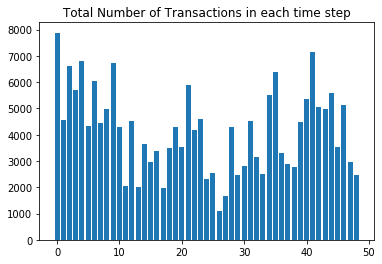

In [17]:
# But how are these transactions distributed through our various time steps ? 
# Let's find out 
# We will create a barplot to represent the development of the transactions through our defined time steps 
group1 = df_features.groupby('Time step').count()['ID']
timesteps = np.arange(0,49)
bar1 = plt.bar(timesteps,group1)
plt.title('Total Number of Transactions in each time step')

# Considering the fact that each time step is 2 weeks we an overall time period of 98 weeks i.e. 24.5 months i.e. 
# near 2 years in total we can observe some significant bursts and drops of activity especially around weeks 10,12 and 25 

# but we can not understand which kind of activities (legal, illegal, unknown) causes these sudden bursts and drops

In [18]:
#In order to explore further  which kind of activities (legal, illegal, unknown) causes 
#these sudden bursts and drops this fact we will split our transactions to the 3 provided classes and visualize again 

# but first we have to merge our features and class dataframes into one 
df_class_and_features = pd.merge(df_classes, df_features)
df_class_and_features.head()
print(df_class_and_features.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203769 entries, 0 to 203768
Columns: 168 entries, ID to Graph_feature_71
dtypes: float64(165), int64(2), object(1)
memory usage: 262.7+ MB
None


In [19]:
# then we will group by the time step and class features 
group_class_and_feature = df_class_and_features.groupby(['Time step', 'Class']).count()
print(group_class_and_feature)

                   ID  Trans_feature_0  Trans_feature_1  Trans_feature_2  \
Time step Class                                                            
1         3      5733             5733             5733             5733   
          1        17               17               17               17   
          2      2130             2130             2130             2130   
2         3      3427             3427             3427             3427   
          1        18               18               18               18   
...               ...              ...              ...              ...   
48        1        36               36               36               36   
          2       435              435              435              435   
49        3      1978             1978             1978             1978   
          1        56               56               56               56   
          2       420              420              420              420   

           

In [20]:
# we collect our counts in one column 
group_class_and_feature = group_class_and_feature['ID'].reset_index().rename(columns={'ID': 'Count'})
print(group_class_and_feature)

     Time step Class  Count
0            1     3   5733
1            1     1     17
2            1     2   2130
3            2     3   3427
4            2     1     18
..         ...   ...    ...
142         48     1     36
143         48     2    435
144         49     3   1978
145         49     1     56
146         49     2    420

[147 rows x 3 columns]


In [21]:
# we then separate each class 
class1 = group_class_and_feature[group_class_and_feature['Class'] == '1']
class2 = group_class_and_feature[group_class_and_feature['Class'] == '2']
class3 = group_class_and_feature[group_class_and_feature['Class'] == 3 ]
print(class1)
print('\n')
print(class2)
print('\n')
print(class3)

     Time step Class  Count
1            1     1     17
4            2     1     18
7            3     1     11
10           4     1     30
13           5     1      8
16           6     1      5
19           7     1    102
22           8     1     67
25           9     1    248
28          10     1     18
31          11     1    131
34          12     1     16
37          13     1    291
40          14     1     43
43          15     1    147
46          16     1    128
49          17     1     99
52          18     1     52
55          19     1     80
58          20     1    260
61          21     1    100
64          22     1    158
67          23     1     53
70          24     1    137
73          25     1    118
76          26     1     96
79          27     1     24
82          28     1     85
85          29     1    329
88          30     1     83
91          31     1    106
94          32     1    342
97          33     1     23
100         34     1     37
103         35     1

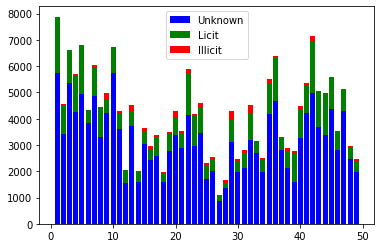

In [22]:
# and finally we proceed to the creation of our barplots 

bar1 = plt.bar(class3['Time step'], class3['Count'], color = 'b', label = 'Unknown')
bar2 = plt.bar(class2['Time step'], class2['Count'], color='g',
             bottom=class3['Count'], label = 'Licit')
bar3 = plt.bar(class1['Time step'], class1['Count'], color='r',
             bottom=np.array(class3['Count'])+np.array(class2['Count']), label = 'Illicit')
plt.legend()
# Now it's pretty clear how the total number of transactions is formed and which kind of activity 
# (illicit, licit or unknown) i have in each time step 

# We remember that the time steps are evenly spaced with an interval of about two weeks.
# It is important to mention that each one of them contains a single connected component of transactions 
# that appeared on the blockchain within less than three hours between each other. 
# Finally there are no edges connecting the different time steps.

In [23]:
# so we should explore a little bit better the form of this connected components in some time steps and to 
# visualize the graphs that are created

# lets start with timestamp 10 and illicit transactions (class 1 )
# we will create first the directed graph that is formed in this case
# first we find the illicit in timestep 10 
illicit = df_class_and_features.loc[(df_class_and_features['Time step'] == 10) & (df_class_and_features['Class'] == '1')]
print(illicit)

             ID Class  Time step  Trans_feature_0  Trans_feature_1  \
51818  43523344     1         10        -0.172905        -0.158783   
52165  43327192     1         10        -0.172424        -0.158783   
52574  42627141     1         10        -0.170057        -0.158783   
52898  43003119     1         10        -0.169909        -0.158783   
53572  43438203     1         10        -0.167401        -0.167462   
54102  43523018     1         10        -0.171491        -0.158783   
54514  43525013     1         10        -0.172237        -0.158783   
55431  43327208     1         10        -0.171963        -0.158783   
55707  42627147     1         10        -0.165382        -0.158783   
55848  43004044     1         10        -0.172369        -0.158783   
55976  43007143     1         10        -0.170712        -0.158783   
56139  43525228     1         10        -0.172748        -0.158783   
57323  43007170     1         10        -0.172369        -0.158783   
57324  43327204     

In [24]:
# we keep their ID
illicit_ID = illicit['ID']
print(illicit_ID)
print('\n')
print(f' There are {len(illicit_ID)} illicit IDs in timestamp 10')

51818    43523344
52165    43327192
52574    42627141
52898    43003119
53572    43438203
54102    43523018
54514    43525013
55431    43327208
55707    42627147
55848    43004044
55976    43007143
56139    43525228
57323    43007170
57324    43327204
57433    43328043
57713    43522396
57802    43527419
57986    43003669
Name: ID, dtype: int64


 There are 18 illicit IDs in timestamp 10


In [25]:
# now we will check in the edgelist dataframe to find which illicit IDs are included there
# so we will track the IDs that they traded with (ID2) 
edges = df_edgelist.loc[df_edgelist['ID1'].isin(illicit_ID)]
print(edges)
print(f'We have {len(edges)} illicit transactions in timestamp 10')

            ID1       ID2
64058  43327208  43521039
64507  43007170  43327204
66822  42627141  43007143
67534  43327192  43517733
68430  43527419  68629305
68559  42627141  37669635
69072  42627147  42627141
We have 7 illicit transactions in timestamp 10


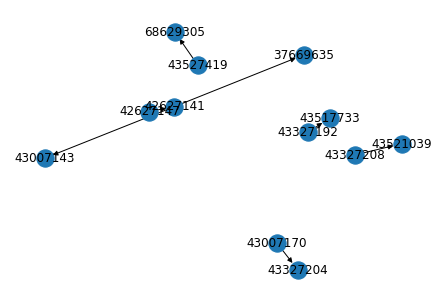

In [26]:
# we will first visualize them with a directed graph 
G = nx.from_pandas_edgelist(edges, source = 'ID1', target = 'ID2', 
                                 create_using = nx.DiGraph())

#Position nodes using Fruchterman-Reingold force-directed algorithm.
#The algorithm simulates a force-directed representation of the network treating edges 
#as springs holding nodes close, while treating nodes as repelling objects, 
#sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium
pos = nx.spring_layout(G)
# print(pos)
#without labels 
# nx.draw(G, pos = pos)
#with labels
nx.draw(G, pos = pos, with_labels = True)
# nx.draw(graph, cmap = plt.get_cmap('terrain'), with_labels=True, pos=pos)

# As we can see from the graph not even one user had illicit transactions with more than one receiver 

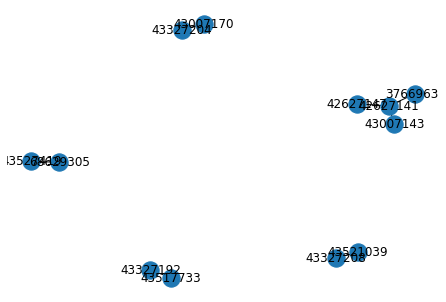

In [27]:
# now we will visualize the corresponding undirected graph
G = nx.from_pandas_edgelist(edges, source = 'ID1', target = 'ID2', 
                                 create_using = nx.Graph())
pos = nx.spring_layout(G)
# print(pos)
nx.draw(G, pos = pos, with_labels = True)

In [28]:
# ok now we figured out what happens visualy when an illicit transaction occurs 
# but what about the licit transactions in timestamp 10?
# lets see, we will follow the same steps as in the illicit case  

# first we find the licit in timestep 10 
licit = df_class_and_features.loc[(df_class_and_features['Time step'] == 10) & (df_class_and_features['Class'] == '2')]
print(licit)

             ID Class  Time step  Trans_feature_0  Trans_feature_1  \
51371  43388675     2         10        -0.125817         4.448752   
51379  13690412     2         10        -0.014147        -0.132897   
51384  43473398     2         10        -0.030952         0.048298   
51386  68806101     2         10        -0.075933         0.103500   
51392  68706499     2         10        -0.069634         2.390893   
...         ...   ...        ...              ...              ...   
58070  43388427     2         10        -0.171928        -0.158783   
58075  43028760     2         10        -0.138367        -0.181302   
58087  43352022     2         10        -0.172207        -0.181561   
58091  43445815     2         10        -0.172198        -0.158783   
58092  43410473     2         10        -0.147256        -0.169302   

       Trans_feature_2  Trans_feature_3  Trans_feature_4  Trans_feature_5  \
51371        -0.646376        26.816496        -0.063725        25.548843   
51379

In [29]:
# we keep their ID
licit_ID = licit['ID']
print(licit_ID)
print('\n')
print(f' There are {len(licit_ID)} licit IDs in timestamp 10')
# we can see again that as expected the licit IDs are more than the illicit ones 

51371    43388675
51379    13690412
51384    43473398
51386    68806101
51392    68706499
           ...   
58070    43388427
58075    43028760
58087    43352022
58091    43445815
58092    43410473
Name: ID, Length: 954, dtype: int64


 There are 954 licit IDs in timestamp 10


In [30]:
# now let's check in the edgelist dataframe to find which licit IDs are included there
# so we will track the IDs that they traded with (ID2) 
edges = df_edgelist.loc[df_edgelist['ID1'].isin(licit_ID)]
print(edges)
print(f'We have {len(edges)} licit transactions in timestamp 10')
# Some users made more than one trasactions (1065 transactions >954 users)

            ID1       ID2
63155  43019093  43023869
63163  43470002  35808292
63166  49172826  68532148
63182  40420842  42638123
63184  13091685  68589263
...         ...       ...
71683   4907336  68452703
71694  43468144  43468337
71707  43015861  43015850
71709  68802682  36892268
71723  68443063  42960585

[1065 rows x 2 columns]
We have 1065 licit transactions in timestamp 10


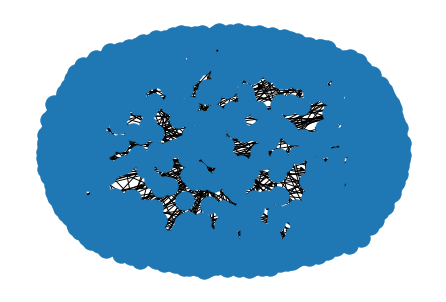

In [31]:
# lets start the visualization again with directed graph 
G = nx.from_pandas_edgelist(edges, source = 'ID1', target = 'ID2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(G)
# print(pos)
# we remove the labels now (IDs) because the plot is more dense than before and the visualization 
#will be worse with them 
nx.draw(G, pos = pos)

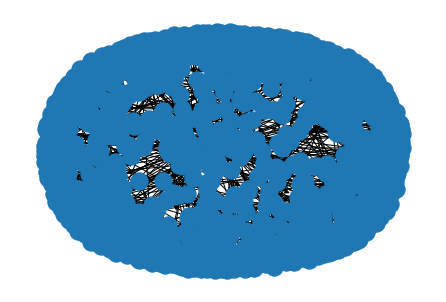

In [32]:
# now we will visualize the corresponding undirected graph
G = nx.from_pandas_edgelist(edges, source = 'ID1', target = 'ID2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(G)
# print(pos)
nx.draw(G, pos = pos)
# we can see the expected growth in the graph in this licit transactions case study 
#in comparsion with the illicit transactions that were less 

# we can also explore some further metrics in this diagrams with the help of gephi 
#like betweenness, closseness centrality, community detection 
#etc 

In [33]:
# we can see that networkx visualization is not the best
# we can not even distinguish the undirected from the directed graph they see the same 
# maybe the use of gephi would help in this case 

In [34]:
# # lets try to improve our visualization a little bit
# # ILLICIT TRANSACTIONS 

# illicit = df_class_and_features.loc[(df_class_and_features['Time step'] == 10) & (df_class_and_features['Class'] == '1')]
# illicit_ID = illicit['ID']
# edges = df_edgelist.loc[df_edgelist['ID1'].isin(illicit_ID)]
# G = nx.from_pandas_edgelist(edges, source = 'ID1', target = 'ID2', 
#                                  create_using = nx.DiGraph())
# pos = nx.spring_layout(G)
# # print(pos)


# edge_x = []
# edge_y = []
# for edge in G.edges():
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]
#     edge_x.append(x0)
#     edge_x.append(x1)
#     edge_x.append(None)
#     edge_y.append(y0)
#     edge_y.append(y1)
#     edge_y.append(None)

# edge_trace = go.Scatter(
#     x=edge_x, y=edge_y,
#     line=dict(width=0.5, color='blue'),
#     hoverinfo='none',
#     mode='lines')

# node_x = []
# node_y = []
# node_text=[]
# for node in G.nodes():
#     x, y = pos[node]
#     node_x.append(x)
#     node_y.append(y)
#     node_text.append(node)

# node_trace = go.Scatter(
#     x=node_x, y=node_y,
#     mode='markers',
#     hoverinfo='text',
#     marker=dict(
#         color=[],
#         size=10,
#         colorbar=dict(
#             thickness=15,
#             title='Transaction Type',
#             xanchor='left',
#             titleside='right',
#             tickmode='array',
#             tickvals=[0,1,2],
#             ticktext=['Unknown','Illicit','Licit']
#         ),
#         line_width=2))
# node_trace.text=node_text
# node_trace.marker.color = pd.to_numeric(df_class_and_features[df_class_and_features['ID'].isin(list(G.nodes()))]['Class'])
# fig = go.Figure(data=[edge_trace, node_trace],
#              layout=go.Layout(
#                 title="Illicit Transactions",
#                 titlefont_size=16,
#                 showlegend=False,
#                 hovermode='closest',
#                 margin=dict(b=20,l=5,r=5,t=40),
#                 annotations=[ dict(
#                     showarrow=True,
#                     xref="paper", yref="paper",
#                     x=0.005, y=-0.002 ) ],
#                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
#                 )
# fig.show()

In [35]:
# # lets try to improve our visualization a little bit
# # lICIT TRANSACTIONS 


# licit = df_class_and_features.loc[(df_class_and_features['Time step'] == 10) & (df_class_and_features['Class'] == '2')]
# licit_ID = licit['ID']
# edges = df_edgelist.loc[df_edgelist['ID1'].isin(licit_ID)]
# G = nx.from_pandas_edgelist(edges, source = 'ID1', target = 'ID2', 
#                                  create_using = nx.DiGraph())
# pos = nx.spring_layout(G)
# # print(pos)

# edge_x = []
# edge_y = []
# for edge in G.edges():
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]
#     edge_x.append(x0)
#     edge_x.append(x1)
#     edge_x.append(None)
#     edge_y.append(y0)
#     edge_y.append(y1)
#     edge_y.append(None)
    
# edge_trace = go.Scatter(
#     x=edge_x, y=edge_y,
#     line=dict(width=0.5, color='blue'),
#     hoverinfo='none',
#     mode='lines')


# node_x = []
# node_y = []
# node_text=[]
# for node in G.nodes():
#     x, y = pos[node]
#     node_x.append(x)
#     node_y.append(y)
#     node_text.append(node)

# node_trace = go.Scatter(
#     x=node_x, y=node_y,
#     mode='markers',
#     hoverinfo='text',
#     marker=dict(
#         color=[],
#         size=10,
#         colorbar=dict(
#             thickness=15,
#             title='Transaction Type',
#             xanchor='left',
#             titleside='right',
#             tickmode='array',
#             tickvals=[0,1,2],
#             ticktext=['Unknown','Illicit','Licit']
#         ),
#         line_width=2))
# node_trace.text=node_text
# node_trace.marker.color = pd.to_numeric(df_class_and_features[df_class_and_features['ID'].isin(list(G.nodes()))]['Class'])

# fig = go.Figure(data=[edge_trace, node_trace],
#              layout=go.Layout(
#                 title="Licit Transactions",
#                 titlefont_size=16,
#                 showlegend=False,
#                 hovermode='closest',
#                 margin=dict(b=20,l=5,r=5,t=40),
#                 annotations=[ dict(
#                     showarrow=True,
#                     xref="paper", yref="paper",
#                     x=0.005, y=-0.002 ) ],
#                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
#                 )
# fig.show()



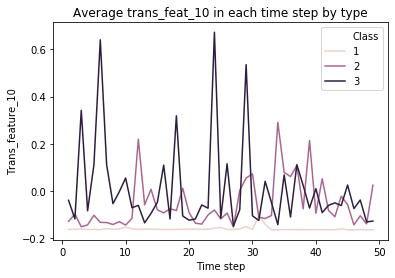

In [36]:
# Regarding the features
# maybe some features will help us to separate effectively illicit from licit transactions than others 
# so the correlation of the features to find the right class classification may prove to be important as well 
# lets explore for example a random feature (Trans_feature_10)

# we remind that  
# 1 means the transaction is illicit / illegal 
# 2 means the transaction is licit / legal 

grouped = df_class_and_features.groupby(['Time step', 'Class'])['Trans_feature_10'].mean().reset_index()
# print(grouped)
sns.lineplot(x='Time step', y='Trans_feature_10',hue = 'Class', data=grouped, legend = 'full');
plt.title('Average trans_feat_10 in each time step by type');

# Trans_feature_10 helps us to distinguish illicit from licit transactions 